In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Don't forget to use `ml_env` environment
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_selection import SequentialFeatureSelector


In [2]:
pd.set_option('display.max_columns', 50)

def clear_cols(s):
    return s.strip().replace(" ","_")

In [3]:
inpatient_path   = 'MyProject/MyCapstone/Healthcare Provider Fraud Detection Analysis/Train_Inpatientdata-1542865627584.csv'
outpatient_path  = 'MyProject/MyCapstone/Healthcare Provider Fraud Detection Analysis/Train_Outpatientdata-1542865627584.csv'
train_path       = 'MyProject/MyCapstone/Healthcare Provider Fraud Detection Analysis/Train-1542865627584.csv'
beneficiary_path = 'MyProject/MyCapstone/Healthcare Provider Fraud Detection Analysis/Train_Beneficiarydata-1542865627584.csv'
# path = '/GitHub Projects/MyProject/MyCapstone/Healthcare Provider Fraud Detection Analysis'
# /GitHub Projects/MyProject/MyCapstone/Healthcare Provider Fraud Detection Analysis
# read inpatient outpatient and train files data
inpatient  = pd.read_csv(inpatient_path).rename(columns=clear_cols)
outpatient = pd.read_csv(outpatient_path).rename(columns=clear_cols)
train      = pd.read_csv(train_path).rename(columns=clear_cols)
bene       = pd.read_csv(beneficiary_path).rename(columns=clear_cols)

In [4]:
train.sample()

,Provider,PotentialFraud
4956,PRV57210,Yes


In [5]:
inpatient.sample()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
5157,BENE29535,CLM73695,2009-10-28,2009-10-31,PRV57225,4000,PHY427812,NaN,NaN,2009-10-28,4280,1068.0,2009-10-31,232,4280,412,5859,40390,42731,V4581,42830,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
outpatient.sample()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
389037,BENE122465,CLM750006,2009-12-29,2009-12-29,PRV52859,0,PHY420891,NaN,PHY339547,3312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [7]:
df = inpatient.groupby('Provider').agg(
    IPAttendingPhysicianNunique = ('AttendingPhysician', 'nunique'),
    IPOperatingPhysicianNunique = ('OperatingPhysician', 'nunique'),
    IPOtherPhysicianNunique = ('OtherPhysician', 'nunique')
).reset_index()
df

,Provider,IPAttendingPhysicianNunique,IPOperatingPhysicianNunique,IPOtherPhysicianNunique
0,PRV51001,4,2,1
1,PRV51003,2,2,0
2,PRV51007,2,1,0
3,PRV51008,2,2,0
4,PRV51011,1,0,0
...,...,...,...,...
2087,PRV57719,4,2,1
2088,PRV57728,1,0,1
2089,PRV57729,10,5,1
2090,PRV57732,2,1,1


In [8]:
out_df = outpatient.groupby('Provider').agg(
    OPAttendingPhysicianNunique = ('AttendingPhysician', 'nunique'),
    OPOperatingPhysicianNunique = ('OperatingPhysician', 'nunique'),
    OPOtherPhysicianNunique = ('OtherPhysician', 'nunique')
).reset_index()
out_df

,Provider,OPAttendingPhysicianNunique,OPOperatingPhysicianNunique,OPOtherPhysicianNunique
0,PRV51001,10,3,7
1,PRV51003,44,5,22
2,PRV51004,38,19,26
3,PRV51005,6,6,4
4,PRV51007,8,4,7
...,...,...,...,...
5007,PRV57759,1,1,1
5008,PRV57760,3,2,2
5009,PRV57761,2,5,2
5010,PRV57762,1,0,0


In [9]:
# Merge IP and OP provider totals
provider_claims = pd.merge(
    df,  
    out_df,  
    on='Provider',
    how='outer'
).fillna(0)  # Fill NaN with 0 for providers with only one type of claims
provider_claims

,Provider,IPAttendingPhysicianNunique,IPOperatingPhysicianNunique,IPOtherPhysicianNunique,OPAttendingPhysicianNunique,OPOperatingPhysicianNunique,OPOtherPhysicianNunique
0,PRV51001,4.0,2.0,1.0,10.0,3.0,7.0
1,PRV51003,2.0,2.0,0.0,44.0,5.0,22.0
2,PRV51004,0.0,0.0,0.0,38.0,19.0,26.0
3,PRV51005,0.0,0.0,0.0,6.0,6.0,4.0
4,PRV51007,2.0,1.0,0.0,8.0,4.0,7.0
...,...,...,...,...,...,...,...
5405,PRV57759,0.0,0.0,0.0,1.0,1.0,1.0
5406,PRV57760,0.0,0.0,0.0,3.0,2.0,2.0
5407,PRV57761,0.0,0.0,0.0,2.0,5.0,2.0
5408,PRV57762,0.0,0.0,0.0,1.0,0.0,0.0


In [10]:
# Then merge with fraud labels
final_df = pd.merge(
    provider_claims,
    train[['Provider', 'PotentialFraud']],
    on='Provider',
    how='outer'
)
final_df

,Provider,IPAttendingPhysicianNunique,IPOperatingPhysicianNunique,IPOtherPhysicianNunique,OPAttendingPhysicianNunique,OPOperatingPhysicianNunique,OPOtherPhysicianNunique,PotentialFraud
0,PRV51001,4.0,2.0,1.0,10.0,3.0,7.0,No
1,PRV51003,2.0,2.0,0.0,44.0,5.0,22.0,Yes
2,PRV51004,0.0,0.0,0.0,38.0,19.0,26.0,No
3,PRV51005,0.0,0.0,0.0,6.0,6.0,4.0,Yes
4,PRV51007,2.0,1.0,0.0,8.0,4.0,7.0,No
...,...,...,...,...,...,...,...,...
5405,PRV57759,0.0,0.0,0.0,1.0,1.0,1.0,No
5406,PRV57760,0.0,0.0,0.0,3.0,2.0,2.0,No
5407,PRV57761,0.0,0.0,0.0,2.0,5.0,2.0,No
5408,PRV57762,0.0,0.0,0.0,1.0,0.0,0.0,No


In [11]:
final_df['PotentialFraud'] = final_df['PotentialFraud'].map({'Yes': 1, 'No': 0})
final_df

,Provider,IPAttendingPhysicianNunique,IPOperatingPhysicianNunique,IPOtherPhysicianNunique,OPAttendingPhysicianNunique,OPOperatingPhysicianNunique,OPOtherPhysicianNunique,PotentialFraud
0,PRV51001,4.0,2.0,1.0,10.0,3.0,7.0,0
1,PRV51003,2.0,2.0,0.0,44.0,5.0,22.0,1
2,PRV51004,0.0,0.0,0.0,38.0,19.0,26.0,0
3,PRV51005,0.0,0.0,0.0,6.0,6.0,4.0,1
4,PRV51007,2.0,1.0,0.0,8.0,4.0,7.0,0
...,...,...,...,...,...,...,...,...
5405,PRV57759,0.0,0.0,0.0,1.0,1.0,1.0,0
5406,PRV57760,0.0,0.0,0.0,3.0,2.0,2.0,0
5407,PRV57761,0.0,0.0,0.0,2.0,5.0,2.0,0
5408,PRV57762,0.0,0.0,0.0,1.0,0.0,0.0,0


In [12]:
final_df.columns

Index(['Provider', 'IPAttendingPhysicianNunique',
       'IPOperatingPhysicianNunique', 'IPOtherPhysicianNunique',
       'OPAttendingPhysicianNunique', 'OPOperatingPhysicianNunique',
       'OPOtherPhysicianNunique', 'PotentialFraud'],
      dtype='object')

In [13]:
X = final_df[['IPAttendingPhysicianNunique',
                'IPOperatingPhysicianNunique', 
                'IPOtherPhysicianNunique', # 3IP
                'OPAttendingPhysicianNunique', 
                'OPOperatingPhysicianNunique',
                'OPOtherPhysicianNunique',]] # 3OP

In [14]:
'IPAttendingPhysicianNunique','IPOperatingPhysicianNunique', 'IPOtherPhysicianNunique', 'OPAttendingPhysicianNunique', 'OPOperatingPhysicianNunique','OPOtherPhysicianNunique'

('IPAttendingPhysicianNunique',
 'IPOperatingPhysicianNunique',
 'IPOtherPhysicianNunique',
 'OPAttendingPhysicianNunique',
 'OPOperatingPhysicianNunique',
 'OPOtherPhysicianNunique')

In [15]:
y = final_df['PotentialFraud']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [17]:
# 2. Scale the features (standardization: mean = 0, std = 1).
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on train, then transform
X_test = scaler.transform(X_test)  # Transform test data using train's mean & std


In [18]:
# 3. Train a logistic regression model.
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)  # Fit model on training data

LogisticRegression(random_state=42)

In [19]:
# 4. Make predictions on the test set.
y_predict = model.predict(X_test)  # Outputs predicted class labels (0 or 1)

y_proba = model.predict_proba(X_test)[:, 1] # Outputs predicted class labels (0 or 1)


In [20]:
from sklearn.metrics import confusion_matrix
# Assuming y_test contains true labels and y_predict contains predicted labels
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[970   7]
 [ 93  12]]


In [21]:
# flatten the confusion matrix and break it down into four components.
TN, FP, FN, TP = cm.ravel()
# print('Confusion Matrix before manipulating by adding the threshold:\n')

# Calculating metrics
accuracy = accuracy_score(y_test, y_predict) # 2 ways to calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN) # Proportion of correct predictions
print(f'Accuracy: {accuracy:.2f}')
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
print(f'Precision: {precision:.2f}')
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
print(f'Recall: {recall:.2f}')
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
print(f'F1 Score: {f1_score:.2f}')

Accuracy: 0.91
Precision: 0.63
Recall: 0.11
F1 Score: 0.19


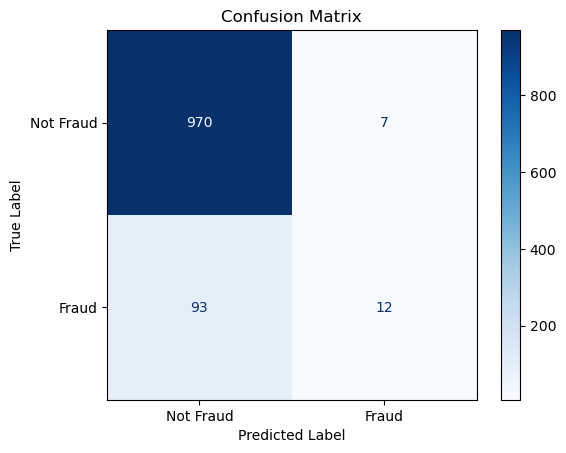

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Compute and display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

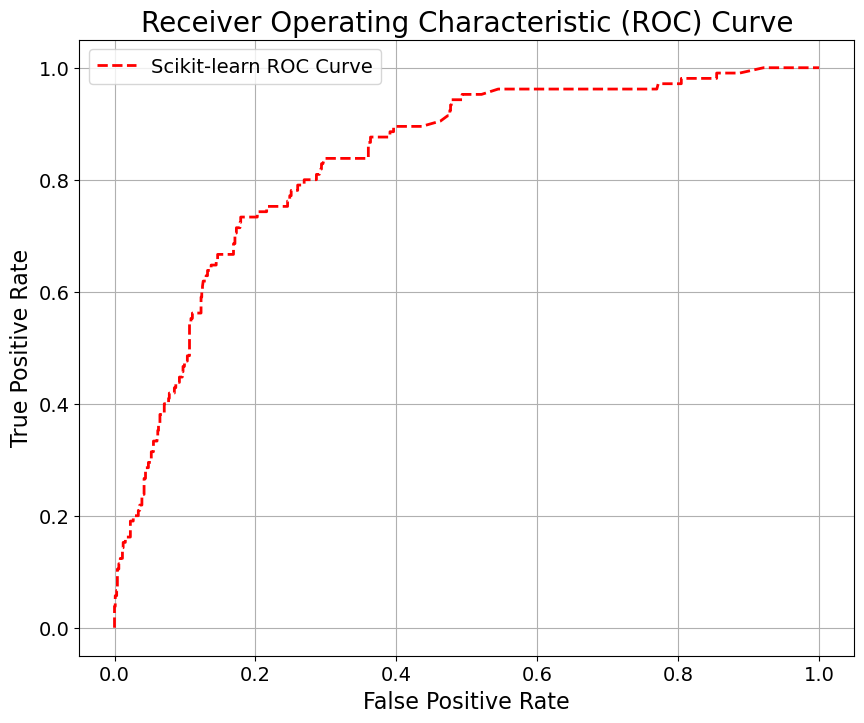

In [23]:
from sklearn.metrics import roc_curve

# Compare with scikit-learn's implementation
# Set up the figure first
fig, ax = plt.subplots(figsize=(10, 8))
# Compare with scikit-learn's implementation
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
# roc_auc = auc(fpr, tpr)
ax.plot(fpr, tpr, 'r--', lw=2, label=f'Scikit-learn ROC Curve') #(AUC = {roc_auc:.2f})')
# Add styling with larger fonts
ax.set_title('Receiver Operating Characteristic (ROC) Curve', fontsize=20)
ax.set_xlabel('False Positive Rate', fontsize=16)
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14)
ax.grid(True)

In [24]:
from sklearn.metrics import auc
# Area Under Curve
auc(fpr, tpr)

np.float64(0.8345225910220793)

### loooking for a better threshold to find better f1 score:

In [22]:
# Get predicted probabilities
y_proba = model.predict_proba(X_test)[:, 1]

In [23]:
precicions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

f1_scores = 2 * (precicions * recalls) / (precicions + recalls)
best_threshold = thresholds[f1_scores.argmax()]
print(f"Optimal threshold based on F1-score: {best_threshold}")

Optimal threshold based on F1-score: 0.09362718411150138


In [24]:
# apply the new best threshold to the predicted probabilities
y_pred_custom = (y_proba >= best_threshold).astype(int)
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_custom)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[848 129]
 [ 38  67]]


In [25]:
# Calculating metrics
accuracy = accuracy_score(y_test, y_pred_custom) # 2 ways to calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN) # Proportion of correct predictions
print(f'Accuracy: {accuracy:.2f}')
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
print(f'Precision: {precision:.2f}')
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
print(f'Recall: {recall:.2f}')
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
print(f'F1 Score: {f1_score:.2f}')

Accuracy: 0.91
Precision: 0.63
Recall: 0.11
F1 Score: 0.19
